<a href="https://colab.research.google.com/github/srivatsanrr/autonom_covid/blob/master/SGB_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#path='https://docs.google.com/spreadsheets/d/1EdYF-eBrgYydUQQVog_82yogxx09GEmU/edit?usp=drive_web&ouid=105826360531599327533&dls=true'
ds = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Train_dataset.xlsx')
ds1 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Test_dataset.xlsx')
ds2= pd.read_excel('/content/drive/My Drive/Colab Notebooks/Test_dataset.xlsx')

In [3]:
ds.shape

(10714, 28)

In [4]:
ds1.shape

(14498, 27)

In [5]:
ds.iloc[:,9:]

,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,8,2,Diabetes,20,14,<400,Normal,134.0,67.0,24.0,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760
10710,8,2,None,42,4,<400,Normal,387.0,102.0,134.0,211.0,65.0,47.0,35,7,1500000.0,700000,NaN,47.148663
10711,8,2,Diabetes,59,3,<100,Stage-02,177.0,111.0,151.0,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533
10712,8,2,Coronary Heart Disease,49,6,<300,Elevated,352.0,140.0,110.0,253.0,56.0,70.0,28,5,2900000.0,700000,1.0,53.803565


In [6]:
# Label Encoding
ds["Region"] = ds["Region"].astype('category').cat.codes
ds["Gender"] = ds["Gender"].astype('category').cat.codes
ds["Designation"] = ds["Designation"].astype('category').cat.codes
ds["Married"] = ds["Married"].astype('category').cat.codes
ds["Mode_transport"] = ds["Mode_transport"].astype('category').cat.codes
ds["Occupation"] = ds["Occupation"].astype('category').cat.codes
ds["Married"] = ds["Married"].astype('category').cat.codes
ds["comorbidity"] = ds["comorbidity"].astype('category').cat.codes
ds["Pulmonary score"] = ds["Pulmonary score"].astype('category').cat.codes
ds["cardiological pressure"] = ds["cardiological pressure"].astype('category').cat.codes

In [7]:
ds=ds.drop(["Name","Insurance", "salary", "people_ID"],  axis=1)

In [8]:
ds.isnull().sum()


Region                       0
Gender                       0
Designation                  0
Married                      0
Children                   311
Occupation                   0
Mode_transport               0
cases/1M                     0
Deaths/1M                    0
comorbidity                  0
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure       0
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [9]:

# Missing value handling using mean and forward fill methods
ds['Children']=ds['Children'].fillna(int(np.mean(ds['Children'])))
ds['Diuresis']=ds['Diuresis'].fillna(int(np.mean(ds['Diuresis'])))
ds['d-dimer']=ds['d-dimer'].fillna(int(np.mean(ds['d-dimer'])))
ds['Heart rate']=ds['Heart rate'].fillna(int(np.mean(ds['Heart rate'])))
ds['Platelets']=ds['Platelets'].fillna(int(np.mean(ds['Platelets'])))
ds['HDL cholesterol']=ds['HDL cholesterol'].fillna(int(np.mean(ds['HDL cholesterol'])))
ds['HBB']=ds['HBB'].fillna(int(np.mean(ds['HBB'])))
ds['FT/month']=ds['FT/month'].fillna(int(np.mean(ds['FT/month'])))
ds['comorbidity'].fillna('ffill', inplace=True)
ds['cardiological pressure'].fillna('ffill', inplace=True)

In [10]:
y_train= ds.iloc[:,-1]
x_train= ds.iloc[:,9:].drop(["Infect_Prob"], axis=1)

In [11]:
from sklearn import preprocessing
sclr = preprocessing.StandardScaler()
x_scaled = sclr.fit_transform(x_train)
dat_x_train = pd.DataFrame(x_scaled)


In [12]:
y_train

0        49.135010
1        51.147880
2        73.224000
3        48.779225
4        87.868800
           ...    
10709    41.981760
10710    47.148663
10711    47.708533
10712    53.803565
10713    68.342400
Name: Infect_Prob, Length: 10714, dtype: float64

In [13]:

y_train.values
criteria = [y_train.between(0, 33), y_train.between(33, 66), y_train.between(66, 100)]
values = ['Low', 'Mid', 'High']
y_categories = np.select(criteria, values, 0)
ds['y_category']=y_categories
ds['y_category']=ds['y_category'].astype('category').cat.codes
ds

,Region,Gender,Designation,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob,y_category
0,1,0,1,1,1.0,4,1,2,0,2,68,8,3,1,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010,2
1,1,0,1,1,2.0,4,2,2,0,1,64,15,0,3,278.0,121.0,56.0,328.0,89.0,68.0,5,6,1.0,51.147880,2
2,1,0,1,0,1.0,1,1,2,0,3,19,13,2,0,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000,0
3,1,0,1,1,1.0,3,0,2,0,0,33,9,1,2,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225,2
4,1,0,1,0,2.0,6,0,2,0,1,23,7,3,1,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,0,1,0,0,2.0,0,0,8,2,1,20,14,3,1,134.0,67.0,24.0,209.0,61.0,56.0,35,7,0.0,41.981760,2
10710,0,1,0,1,0.0,6,0,8,2,3,42,4,3,1,387.0,102.0,134.0,211.0,65.0,47.0,35,7,1.0,47.148663,2
10711,0,1,0,1,0.0,2,1,8,2,1,59,3,0,3,177.0,111.0,151.0,296.0,87.0,37.0,16,5,2.0,47.708533,2
10712,0,1,0,1,1.0,5,2,8,2,0,49,6,2,0,352.0,140.0,110.0,253.0,56.0,70.0,28,5,1.0,53.803565,2


In [14]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [24]:
x=x_train
y= ds.iloc[:,-1].values
print(x)
print(y)

       comorbidity  Age  Coma score  ...  Charlson Index  Blood Glucose  FT/month
0                2   68           8  ...              27              7       2.0
1                1   64          15  ...               5              6       1.0
2                3   19          13  ...              40              6       1.0
3                0   33           9  ...              27              7       1.0
4                1   23           7  ...              32              7       1.0
...            ...  ...         ...  ...             ...            ...       ...
10709            1   20          14  ...              35              7       0.0
10710            3   42           4  ...              35              7       1.0
10711            1   59           3  ...              16              5       2.0
10712            0   49           6  ...              28              5       1.0
10713            1   17           7  ...               4              3       0.0

[10714 rows x 1

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.20, random_state=101)
X_train=X_train
Y_train=Y_train.reshape(-1, 1)
print(X_train.shape)


(8571, 14)


In [26]:
Y_train

array([[2],
       [2],
       [2],
       ...,
       [0],
       [2],
       [2]], dtype=int8)

In [27]:
xgb_param = {'max_depth':5, 'objective':'binary:logistic', 'subsample':0.8, 
         'colsample_bytree':0.8, 'learning_rate':0.5, 'min_child_weight':1,
         'tree_method':'gpu_hist'}
model = XGBClassifier(**xgb_param)

In [28]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [29]:
pred= model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, Y_test.reshape(-1,1))


In [33]:
accuracy

0.894540363975735

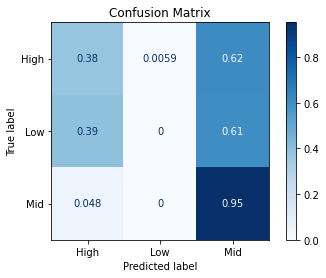

In [34]:
from sklearn.metrics import plot_confusion_matrix
display = plot_confusion_matrix(model, X_test, Y_test.reshape(-1,1),display_labels=['High','Low','Mid'],cmap=plt.cm.Blues, normalize='true')
display.ax_.set_title("Confusion Matrix")
plt.show()


In [35]:
from sklearn.externals import joblib
joblib.dump(model, 'model_SGB.pkl')

['model_SGB.pkl']